In [6]:
import pandas as pd
import numpy as np


In [7]:
from sklearn.decomposition import PCA
import matplotlib. pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.lines import Line2D
from sklearn.cluster import KMeans
import re

In [8]:
from sklearn.preprocessing import StandardScaler,LabelEncoder


In [9]:

data_path =  'C:\\Users\\swrps\\PycharmProjects\\masterProject\\data.csv'
labels_path = 'C:\\Users\\swrps\\PycharmProjects\\masterProject\\labels.csv'

Exploratory Data Analysis(EDA)

In [10]:
# Read data.csv
data = pd.read_csv(data_path)

data

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,sample_796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,sample_797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,sample_798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,sample_799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


In [11]:
data.dtypes

Unnamed: 0     object
gene_0        float64
gene_1        float64
gene_2        float64
gene_3        float64
               ...   
gene_20526    float64
gene_20527    float64
gene_20528    float64
gene_20529    float64
gene_20530    float64
Length: 20532, dtype: object

In [12]:
# Finding duplicates rows and deleting it. (no duplicate rows found)
data.drop_duplicates(subset=data.columns.difference(['sample']))
data

,Unnamed: 0,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,sample_0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,sample_1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,sample_2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,sample_3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,sample_4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,sample_796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,sample_797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,sample_798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,sample_799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


In [13]:
# Check if there are any missing values in the DataFrame
if data.isnull().any().any():
    print("There are missing values in the DataFrame.")
else:
    print("There are no missing values in the DataFrame.")



There are no missing values in the DataFrame.


In [14]:
data=data.loc[:, ~data.columns.str.contains('^Unnamed')]

In [15]:
data

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


In [16]:
data.describe()

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
count,801.000000,801.000000,801.000000,801.000000,801.000000,801.0,801.000000,801.000000,801.000000,801.000000,...,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000,801.000000
mean,0.026642,3.010909,3.095350,6.722305,9.813612,0.0,7.405509,0.499882,0.016744,0.013428,...,5.896573,8.765891,10.056252,4.847727,9.741987,11.742228,10.155271,9.590726,5.528177,0.095411
std,0.136850,1.200828,1.065601,0.638819,0.506537,0.0,1.108237,0.508799,0.133635,0.204722,...,0.746399,0.603176,0.379278,2.382728,0.533898,0.670371,0.580569,0.563849,2.073859,0.364529
min,0.000000,0.000000,0.000000,5.009284,8.435999,0.0,3.930747,0.000000,0.000000,0.000000,...,2.853517,6.678368,8.669456,0.000000,7.974942,9.045255,7.530141,7.864533,0.593975,0.000000
25%,0.000000,2.299039,2.390365,6.303346,9.464466,0.0,6.676042,0.000000,0.000000,0.000000,...,5.454926,8.383834,9.826027,3.130750,9.400747,11.315857,9.836525,9.244219,4.092385,0.000000
50%,0.000000,3.143687,3.127006,6.655893,9.791599,0.0,7.450114,0.443076,0.000000,0.000000,...,5.972582,8.784144,10.066385,5.444935,9.784524,11.749802,10.191207,9.566511,5.218618,0.000000
75%,0.000000,3.883484,3.802534,7.038447,10.142324,0.0,8.121984,0.789354,0.000000,0.000000,...,6.411292,9.147136,10.299025,6.637412,10.082269,12.177852,10.578561,9.917888,6.876382,0.000000
max,1.482332,6.237034,6.063484,10.129528,11.355621,0.0,10.718190,2.779008,1.785592,4.067604,...,7.771054,11.105431,11.318243,9.207495,11.811632,13.715361,11.675653,12.813320,11.205836,5.254133


In [17]:
sample_labels= pd.read_csv(labels_path)
sample_labels

,Unnamed: 0,Class
0,sample_0,PRAD
1,sample_1,LUAD
2,sample_2,PRAD
3,sample_3,PRAD
4,sample_4,BRCA
...,...,...
796,sample_796,BRCA
797,sample_797,LUAD
798,sample_798,COAD
799,sample_799,PRAD


In [18]:
labels_data=sample_labels.drop(columns=['Unnamed: 0'])

labels_data


,Class
0,PRAD
1,LUAD
2,PRAD
3,PRAD
4,BRCA
...,...
796,BRCA
797,LUAD
798,COAD
799,PRAD


In [19]:
#check how many different cancer types are there in the data
labels_data['Class'].value_counts()

Class
BRCA    300
KIRC    146
LUAD    141
PRAD    136
COAD     78
Name: count, dtype: int64

<Axes: xlabel='Class'>

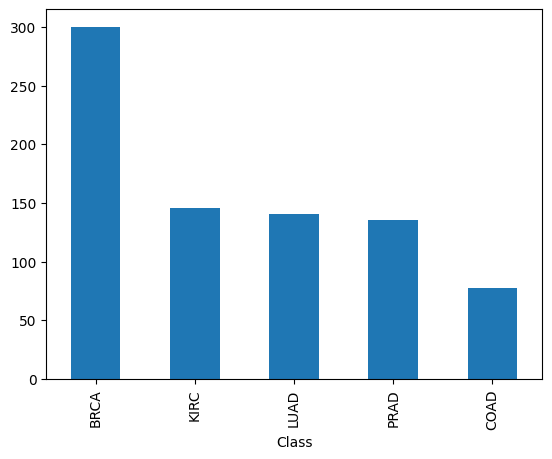

In [20]:
#how labels data is distributed
labels_data['Class'].value_counts().plot.bar()

In [21]:
# Standardize the data
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
data_scaled


array([[-0.19479935, -0.82802988,  0.15980044, ..., -1.18793812,
        -0.11648251, -0.26190144],
       [-0.19479935, -2.01501735, -1.415042  , ..., -0.34227662,
        -1.65688871, -0.26190144],
       [-0.19479935,  0.41734754,  1.15673547, ...,  0.88686027,
        -1.85526414, -0.26190144],
       ...,
       [-0.19479935,  0.19888076,  0.57481583, ..., -0.22008186,
        -0.41046699,  1.3485582 ],
       [-0.19479935, -0.35045311, -0.28863152, ...,  1.43719268,
         0.09195083, -0.26190144],
       [-0.19479935, -0.57135218,  0.66725377, ...,  0.45087581,
        -0.47161901, -0.26190144]])

In [22]:
# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
data_pca = pca.fit_transform(data_scaled)


In [23]:
data_pca

array([[-57.44698701,  95.41098073],
       [-16.91942995,   0.73247008],
       [-70.34521779, -19.3033262 ],
       ...,
       [ -4.13308971,  15.69001457],
       [-30.81475749,  33.52642257],
       [-22.34455671,   4.05235631]])

In [24]:
print("original number of features",data.shape[1])
print("reduced number of features",data_pca.shape[1])

original number of features 20531
reduced number of features 2


In [25]:
pca.explained_variance_ratio_

array([0.10539781, 0.08754232])

In [26]:
# Convert class labels to numerical values using LabelEncoder
label_encoder = LabelEncoder()
labels_numeric = label_encoder.fit_transform(labels_data['Class'])
labels_numeric

array([4, 3, 4, 4, 0, 4, 2, 4, 0, 4, 0, 2, 4, 0, 0, 0, 3, 2, 2, 4, 0, 2,
       3, 0, 2, 3, 1, 0, 0, 0, 0, 0, 2, 0, 4, 0, 2, 3, 0, 0, 2, 4, 4, 2,
       2, 0, 4, 1, 0, 3, 0, 3, 0, 4, 1, 0, 0, 1, 2, 0, 3, 2, 0, 3, 4, 1,
       0, 4, 2, 0, 2, 0, 0, 3, 0, 3, 0, 2, 4, 1, 0, 4, 0, 0, 4, 4, 0, 0,
       2, 0, 4, 4, 0, 0, 0, 4, 1, 0, 4, 0, 0, 2, 0, 2, 3, 2, 3, 1, 3, 3,
       4, 0, 3, 4, 0, 2, 2, 2, 0, 0, 3, 2, 3, 0, 4, 4, 4, 0, 2, 3, 1, 0,
       1, 0, 0, 2, 3, 0, 2, 1, 0, 4, 0, 2, 3, 1, 4, 0, 3, 3, 3, 3, 0, 0,
       3, 0, 0, 4, 4, 3, 4, 3, 2, 0, 4, 3, 1, 2, 3, 0, 2, 3, 0, 3, 0, 0,
       0, 4, 0, 2, 1, 2, 0, 4, 4, 4, 3, 3, 0, 3, 3, 2, 3, 4, 3, 0, 0, 0,
       3, 3, 0, 2, 2, 2, 2, 4, 0, 4, 0, 3, 3, 0, 4, 0, 4, 0, 0, 0, 3, 0,
       2, 3, 2, 2, 3, 0, 2, 4, 0, 3, 3, 4, 1, 0, 2, 4, 2, 1, 0, 2, 2, 3,
       4, 4, 3, 3, 2, 0, 0, 1, 0, 4, 1, 0, 4, 2, 4, 4, 4, 0, 1, 1, 3, 1,
       1, 4, 3, 0, 0, 2, 2, 0, 1, 4, 2, 4, 0, 0, 2, 0, 0, 0, 0, 3, 3, 0,
       0, 0, 2, 2, 2, 2, 0, 0, 0, 2, 0, 0, 3, 4, 0,

# Visualization of data

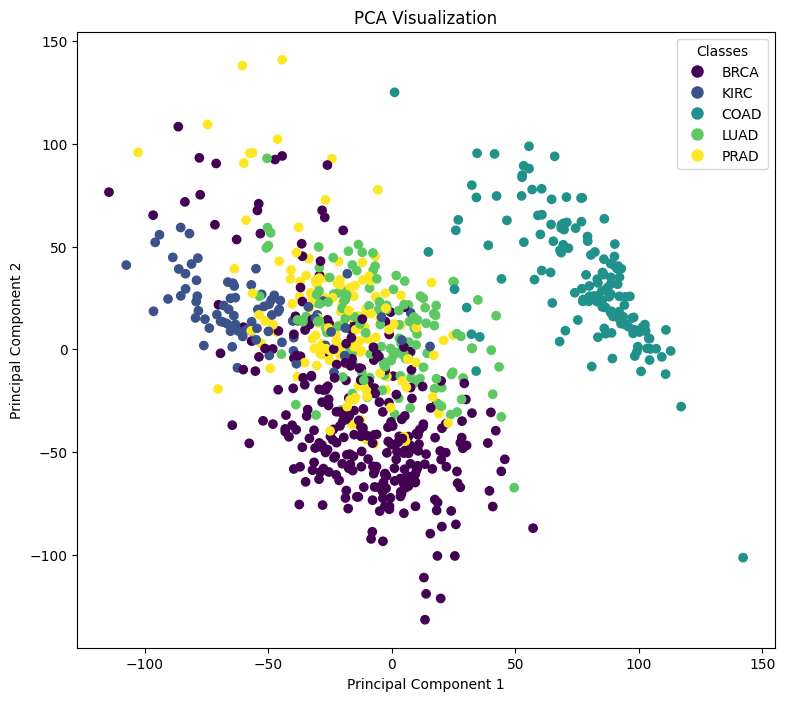

In [27]:
#Assuming class_names as a list containing the names of five classes
class_names = ['BRCA', 'KIRC', 'COAD', 'LUAD', 'PRAD']

# Number of classes
num_classes = len(class_names)

# Get colors from viridis colormap
viridis_colors = plt.get_cmap('viridis')(np.linspace(0, 1, num_classes))

plt.figure(figsize=(9, 8)) 
scatter = plt.scatter(data_pca[:, 0], data_pca[:, 1], c=labels_numeric, cmap='viridis')

# Create a legend with class names and corresponding colors
legend_labels = [Line2D([0], [0], marker='o', color='w', 
                        markerfacecolor=viridis_colors[i], markersize=10, label=class_names[i]) for i in range(num_classes)]

plt.legend(handles=legend_labels, title='Classes')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA Visualization')
plt.show()


In [28]:
# Applying PCA with 3 components
pca = PCA(n_components=3)
data_pca = pca.fit_transform(data_scaled)

In [29]:
data_pca

array([[-57.44698702,  95.41098066,  74.30154338],
       [-16.91942993,   0.73247051, -64.07289993],
       [-70.34521768, -19.30332633,  20.48824041],
       ...,
       [ -4.13308988,  15.69001366, -22.64445321],
       [-30.81475746,  33.52642254,  70.5656359 ],
       [-22.34455668,   4.0523563 ,  32.32787574]])

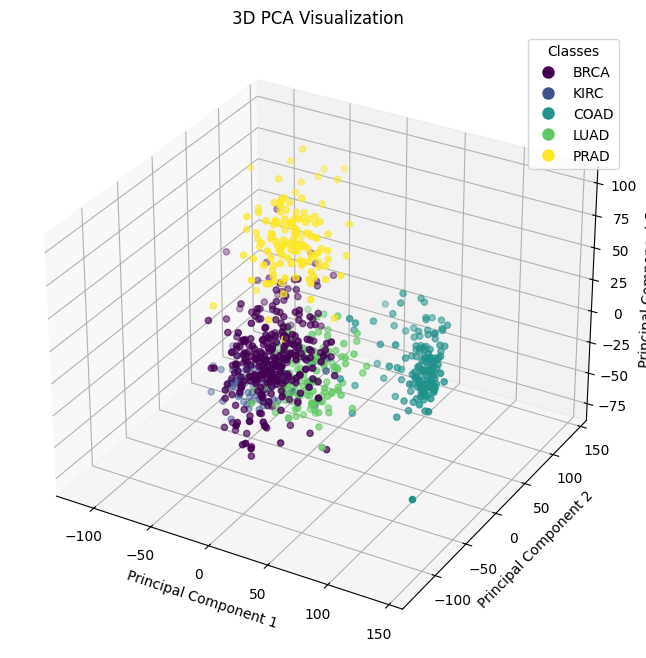

In [30]:
# Assuming  class_names as a list containing the names of  five classes
class_names = ['BRCA', 'KIRC', 'COAD', 'LUAD', 'PRAD']

# Number of classes
num_classes = len(class_names)

# Get colors from viridis colormap
viridis_colors = plt.get_cmap('viridis')(np.linspace(0, 1, num_classes))

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(data_pca[:, 0], data_pca[:, 1], data_pca[:, 2], c=labels_numeric, cmap='viridis')

# Create a legend with class names and corresponding colors
legend_labels = [Line2D([0], [0], marker='o', color='w', markerfacecolor=viridis_colors[i], 
                        markersize=10, label=class_names[i]) for i in range(num_classes)]

ax.legend(handles=legend_labels, title='Classes')
ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA Visualization')
plt.show()


In [31]:
# Apply K-Means clusteringd
kmeans = KMeans(n_clusters=5,n_init=10)  # Assuming 5 clusters (cancer subtypes)
cluster_labels = kmeans.fit_predict(data_pca)

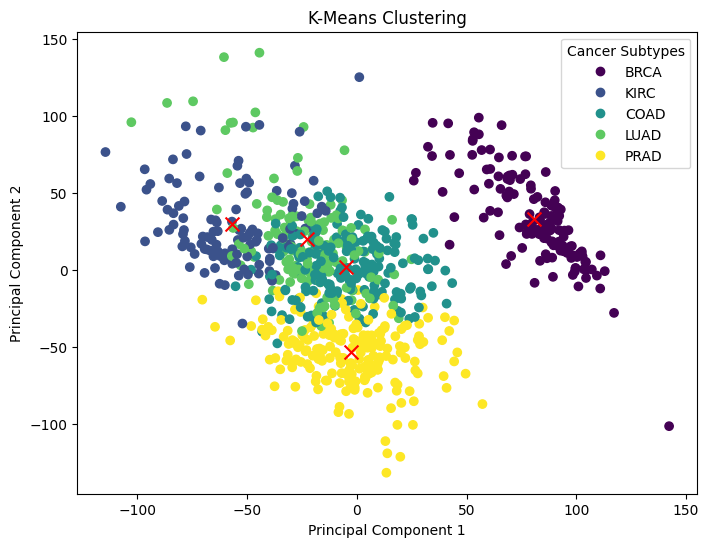

In [32]:
# Define a mapping from cluster labels to cancer subtypes
cluster_to_subtype = {
    '0': 'BRCA',
    '1': 'KIRC',
    '2': 'COAD',
    '3': 'LUAD',
    '4': 'PRAD'
}

# Create a scatter plot for the K-Means clustering results
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels, cmap='viridis')
cluster_centers = kmeans.cluster_centers_

# Plot cluster centers
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', marker='x', s=100, label='Cluster Centers')

# Set the labels and title
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering')

# Add a legend with cancer subtype names
handles, labels = scatter.legend_elements()
legend_labels = [cluster_to_subtype[re.sub(r'\$\\mathdefault\{(.+?)\}\$', r'\1', label)] for label in labels]
plt.legend(handles, legend_labels, title='Cancer Subtypes')

# Show the plot
plt.show()



In [33]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split


In [34]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [35]:
data

,gene_0,gene_1,gene_2,gene_3,gene_4,gene_5,gene_6,gene_7,gene_8,gene_9,...,gene_20521,gene_20522,gene_20523,gene_20524,gene_20525,gene_20526,gene_20527,gene_20528,gene_20529,gene_20530
0,0.0,2.017209,3.265527,5.478487,10.431999,0.0,7.175175,0.591871,0.0,0.0,...,4.926711,8.210257,9.723516,7.220030,9.119813,12.003135,9.650743,8.921326,5.286759,0.000000
1,0.0,0.592732,1.588421,7.586157,9.623011,0.0,6.816049,0.000000,0.0,0.0,...,4.593372,7.323865,9.740931,6.256586,8.381612,12.674552,10.517059,9.397854,2.094168,0.000000
2,0.0,3.511759,4.327199,6.881787,9.870730,0.0,6.972130,0.452595,0.0,0.0,...,5.125213,8.127123,10.908640,5.401607,9.911597,9.045255,9.788359,10.090470,1.683023,0.000000
3,0.0,3.663618,4.507649,6.659068,10.196184,0.0,7.843375,0.434882,0.0,0.0,...,6.076566,8.792959,10.141520,8.942805,9.601208,11.392682,9.694814,9.684365,3.292001,0.000000
4,0.0,2.655741,2.821547,6.539454,9.738265,0.0,6.566967,0.360982,0.0,0.0,...,5.996032,8.891425,10.373790,7.181162,9.846910,11.922439,9.217749,9.461191,5.110372,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
796,0.0,1.865642,2.718197,7.350099,10.006003,0.0,6.764792,0.496922,0.0,0.0,...,6.088133,9.118313,10.004852,4.484415,9.614701,12.031267,9.813063,10.092770,8.819269,0.000000
797,0.0,3.942955,4.453807,6.346597,10.056868,0.0,7.320331,0.000000,0.0,0.0,...,6.371876,9.623335,9.823921,6.555327,9.064002,11.633422,10.317266,8.745983,9.659081,0.000000
798,0.0,3.249582,3.707492,8.185901,9.504082,0.0,7.536589,1.811101,0.0,0.0,...,5.719386,8.610704,10.485517,3.589763,9.350636,12.180944,10.681194,9.466711,4.677458,0.586693
799,0.0,2.590339,2.787976,7.318624,9.987136,0.0,9.213464,0.000000,0.0,0.0,...,5.785237,8.605387,11.004677,4.745888,9.626383,11.198279,10.335513,10.400581,5.718751,0.000000


In [36]:
labels_data

,Class
0,PRAD
1,LUAD
2,PRAD
3,PRAD
4,BRCA
...,...
796,BRCA
797,LUAD
798,COAD
799,PRAD


In [37]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels_data, test_size=0.2, random_state=42)

In [38]:
# Create and fit a PCA transformer on the training data
pca = PCA(n_components=2)  
X_train_pca = pca.fit_transform(X_train)

In [39]:
# Transform the testing data using the PCA transformation from the training data
X_test_pca = pca.transform(X_test)

In [40]:
# Random Forest
rf_classifier = RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train_pca, y_train.values.ravel())
rf_pred = rf_classifier.predict(X_test_pca)

In [41]:
# Compute accuracy
rf_accuracy = accuracy_score(y_test, rf_pred) * 100
rf_precision = precision_score(y_test, rf_pred, average='macro') * 100
rf_recall = recall_score(y_test, rf_pred, average='macro') * 100
rf_f1_score = f1_score(y_test, rf_pred, average='macro') * 100

# Display the metrics
print("Random Forest Accuracy: {:.2f}%".format(rf_accuracy))
print("Random Forest Precision (macro average): {:.2f}%".format(rf_precision))
print("Random Forest Recall (macro average): {:.2f}%".format(rf_recall))
print("Random Forest F1 Score (macro average): {:.2f}%".format(rf_f1_score))
target_names = ['BRCA', 'KIRC', 'COAD', 'LUAD','PRAD']  

Random Forest Accuracy: 94.41%
Random Forest Precision (macro average): 95.31%
Random Forest Recall (macro average): 94.63%
Random Forest F1 Score (macro average): 94.72%


In [42]:
# Generate a classification report
report = classification_report(y_test, rf_pred, target_names=target_names)

# Print the classification report
print("Classification Report:\n", report)


Classification Report:
               precision    recall  f1-score   support

        BRCA       0.97      0.92      0.94        61
        KIRC       1.00      0.88      0.94        17
        COAD       1.00      1.00      1.00        25
        LUAD       0.80      0.97      0.88        29
        PRAD       1.00      0.97      0.98        29

    accuracy                           0.94       161
   macro avg       0.95      0.95      0.95       161
weighted avg       0.95      0.94      0.95       161



# 

In [43]:
# Create an SVM classifier
svm_classifier = SVC()

# Train the SVM classifier on the training data
svm_classifier.fit(X_train_pca, y_train.values.ravel())

# Make predictions on the testing data
svm_pred = svm_classifier.predict(X_test_pca)


# Evaluate the SVM classifier's performance
svm_accuracy = accuracy_score(y_test, svm_pred) * 100
svm_precision = precision_score(y_test, svm_pred, average='macro') * 100
svm_recall = recall_score(y_test, svm_pred, average='macro') * 100
svm_f1_score = f1_score(y_test, svm_pred, average='macro') * 100

print("SVM Accuracy: {:.2f}%".format(svm_accuracy))
print("SVM Precision (macro average): {:.2f}%".format(svm_precision))
print("SVM Recall (macro average): {:.2f}%".format(svm_recall))
print("SVM F1 Score (macro average): {:.2f}%".format(svm_f1_score))


SVM Accuracy: 93.79%
SVM Precision (macro average): 94.91%
SVM Recall (macro average): 93.81%
SVM F1 Score (macro average): 93.83%


In [44]:
# Create a Logistic Regression classifier
lr_classifier = LogisticRegression(max_iter=1000)

# Train the Logistic Regression classifier on the training data
lr_classifier.fit(X_train_pca, y_train.values.ravel())

# Make predictions on the testing data
lr_pred = lr_classifier.predict(X_test_pca)

# Evaluate the Logistic Regression classifier's performance
lr_accuracy = accuracy_score(y_test, lr_pred) * 100
lr_precision = precision_score(y_test, lr_pred, average='macro') * 100
lr_recall = recall_score(y_test, lr_pred, average='macro') * 100
lr_f1_score = f1_score(y_test, lr_pred, average='macro') * 100

print("Logistic Regression Accuracy: {:.2f}%".format(lr_accuracy))
print("Logistic Regression Precision (macro average): {:.2f}%".format(lr_precision))
print("Logistic Regression Recall (macro average): {:.2f}%".format(lr_recall))
print("Logistic Regression F1 Score (macro average): {:.2f}%".format(lr_f1_score))
# Inspect the classes associated with each binary classifier
classes_associated = lr_classifier.classes_
print("Unique Classes:", classes_associated)



Logistic Regression Accuracy: 94.41%
Logistic Regression Precision (macro average): 95.32%
Logistic Regression Recall (macro average): 94.99%
Logistic Regression F1 Score (macro average): 94.78%
Unique Classes: ['BRCA' 'COAD' 'KIRC' 'LUAD' 'PRAD']


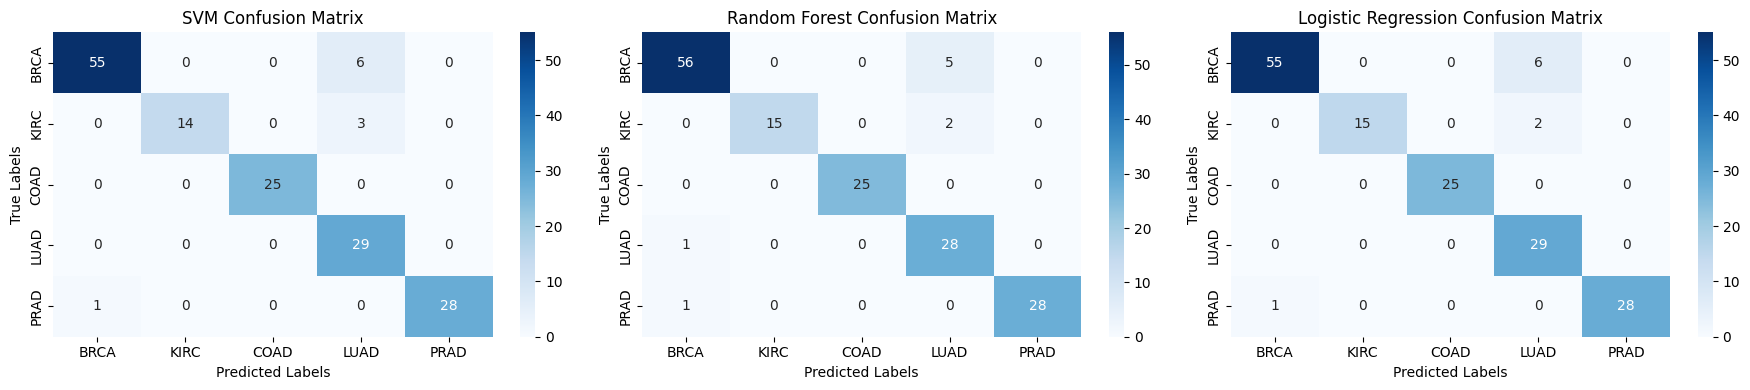

In [45]:
def plot_confusion_matrix(ax, classifier_name, y_true, y_pred, target_names):
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Plotting heatmap
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names, ax=ax)
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    ax.set_title(f'{classifier_name} Confusion Matrix')

# Create a subplot with 1 row and 3 columns
fig, axes = plt.subplots(1, 3, figsize=(18, 4))

# Assuming you have svm_pred, rf_pred, and lr_pred
plot_confusion_matrix(axes[0], 'SVM', y_test, svm_pred, target_names)
plot_confusion_matrix(axes[1], 'Random Forest', y_test, rf_pred, target_names)
plot_confusion_matrix(axes[2], 'Logistic Regression', y_test, lr_pred, target_names)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [46]:
def perform_cross_validation(classifier, X_train, y_train):
    # Perform cross-validation on the training data
    scores = cross_val_score(classifier, X_train, y_train.values.ravel(), cv=5)

    # Calculate the mean and standard deviation of the cross-validation scores
    mean_score = scores.mean()
    std_deviation = scores.std()

    # Print the results
    print(f"{classifier.__class__.__name__} Cross-Validation Scores:", scores)
    print(f"{classifier.__class__.__name__} Mean Score:", mean_score)
    print(f"{classifier.__class__.__name__} Standard Deviation:", std_deviation)

# Random Forest
rf_classifier = RandomForestClassifier() 
perform_cross_validation(rf_classifier, X_train_pca, y_train)

RandomForestClassifier Cross-Validation Scores: [0.9453125 0.9375    0.9296875 0.9609375 0.9375   ]
RandomForestClassifier Mean Score: 0.9421875
RandomForestClassifier Standard Deviation: 0.010597390598633231


In [47]:
# SVM
svm_classifier = SVC()  
perform_cross_validation(svm_classifier, X_train_pca, y_train)

SVC Cross-Validation Scores: [0.9453125 0.953125  0.9453125 0.953125  0.9453125]
SVC Mean Score: 0.9484375
SVC Standard Deviation: 0.0038273277230987156


In [48]:
# Logistic Regression
logreg_classifier = LogisticRegression(max_iter=1000) 
perform_cross_validation(logreg_classifier, X_train_pca, y_train)

LogisticRegression Cross-Validation Scores: [0.9453125 0.9296875 0.953125  0.96875   0.953125 ]
LogisticRegression Mean Score: 0.95
LogisticRegression Standard Deviation: 0.012693810007243688


C:\Users\swrps\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


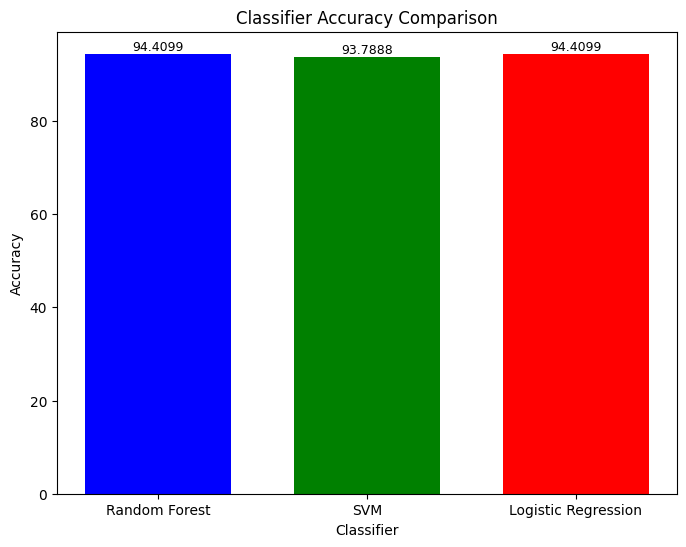

In [49]:
#  calculated accuracy for each algorithm
classifier_names = ['Random Forest', 'SVM', 'Logistic Regression']
classifier_accuracies = [rf_accuracy, svm_accuracy, lr_accuracy]
plt.figure(figsize=(8, 6))

# Create an array of indices for each algorithm
indices = np.arange(len(classifier_names))
bar_width = 0.7
# Plotting the grouped bar chart for accuracy
bars = plt.bar(indices, classifier_accuracies, bar_width, color=['blue', 'green', 'red'])

# Adding custom x-axis and y-axis labels
plt.xlabel('Classifier', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)

# Adding text annotations for accuracy values
for i, bar in enumerate(bars):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.01, f'{classifier_accuracies[i]:.4f}', 
             ha='center', va='bottom', fontsize=9, color='black')

# Set custom x-axis labels
plt.xticks(indices, classifier_names, fontsize=10)
plt.title('Classifier Accuracy Comparison', fontsize=12)
plt.show()
